In [1]:
import numpy as np
import torch
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt
from MCMC.BayesRegression import Bayes_regression
from Optimization.CD import SR

In [2]:
N=100
P=1000
Corr=0.5**toeplitz(np.arange(0,P),np.arange(0,P))
beta=np.zeros((P,1))
beta[0]=3
beta[1]=1.5
beta[4]=2
beta[9]=1
beta[12]=1
beta[18]=0.5
beta[25]=-0.5
beta[30]=2.0
beta[45]=-1.2
beta[50]=-1
sigma=3**0.5
X=np.random.multivariate_normal(np.zeros(P), Corr, N)
Y=X@beta+sigma*np.random.randn(N,1)

In [3]:
device1 = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
#Simulation 
beta_sample,sigma2_sample=Bayes_regression(torch.from_numpy(Y).to(device1),torch.from_numpy(X).to(device1),1,0.1*P,1)

100%|██████████| 19999/19999 [00:11<00:00, 1782.57it/s]


In [12]:
#Optimization
beta_estimator,sigma2_estimator,beta_path=SR(torch.from_numpy(Y).to(device1),torch.from_numpy(X).to(device1),C=1.5,s=3,path=True)

In [13]:
beta_mean=beta_sample.mean(axis=1)
sigma2_mean=sigma2_sample.mean()

In [14]:
sigma2_estimator

tensor([[2.5439]])

In [15]:
sigma2_mean

tensor(40.2670)

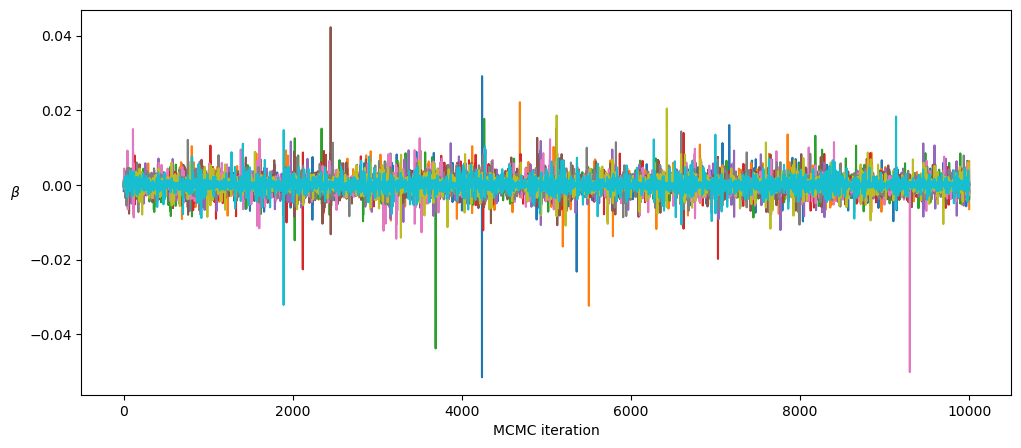

In [16]:
plt.figure(figsize=(12, 5))
plt.rcParams['font.size'] = 10

plt.plot(beta_sample[[0, 1, 4, 9,12,18,25,30,45,50], :].cpu().numpy().T)
plt.xlabel('MCMC iteration')
plt.ylabel(r'$\beta$', rotation=0, labelpad=10)
plt.show()

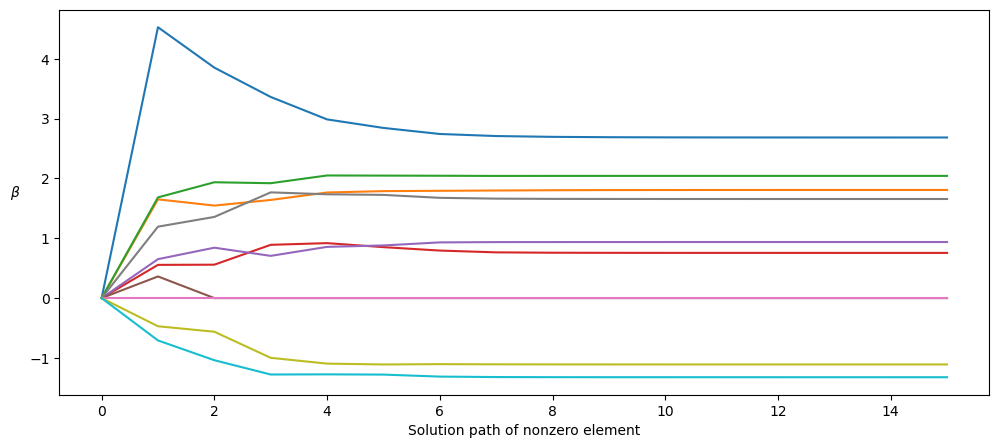

In [17]:
plt.figure(figsize=(12, 5))
plt.rcParams['font.size'] = 10

plt.plot(beta_path[:,[0, 1, 4, 9,12,18,25,30,45,50]])
plt.xlabel('Solution path of nonzero element')
plt.ylabel(r'$\beta$', rotation=0, labelpad=10)
plt.show()

In [18]:
(beta_estimator!=0).sum()

tensor(9)